In [15]:
import numpy as np
import pandas as pd
import csv
from datetime import datetime, date
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys
from stockstats import StockDataFrame as Sdf

In [16]:
bit_price_df = pd.read_csv('input/bitcoin_price.csv', sep=";")

for i, row in bit_price_df.iterrows():
    dt = datetime.strptime(row['Date'], '%b %d, %Y')
    dt = dt.strftime('%Y-%m-%d')
    row['Date'] = dt
    bit_price_df.at[i, 'Date']=dt

bit_price_df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2020-04-10,7315.25,7315.25,7315.25,7315.25,NaN,NaN
1,2020-04-09,7369.60,7378.85,7115.04,7315.25,NaN,NaN
2,2020-04-08,7201.81,7432.23,7152.80,7369.60,NaN,NaN
3,2020-04-07,7336.96,7468.42,7078.00,7201.81,NaN,NaN
4,2020-04-06,6775.21,7369.76,6771.01,7336.96,NaN,NaN


In [17]:
bitcoin_dataset_df = pd.read_csv('input/bitcoin_dataset.csv', sep=";")

for i, row in bitcoin_dataset_df.iterrows():
    dt = datetime.strptime(row['Date'], '%d/%m/%Y 00:00')        
    dt = dt.strftime('%Y-%m-%d')
    row['Date'] = dt
    bitcoin_dataset_df.at[i, 'Date']=dt

bitcoin_dataset_df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,25100.000000,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0
1,2010-02-24,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,179.245283,0.0,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0
2,2010-02-25,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,...,1057.142857,0.0,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0
3,2010-02-26,0.0,2136100.0,0.0,0.0,0.0,0.000319,0.0,1.0,0.0,...,64.582059,0.0,176.0,176.0,43135.0,176.0,176.0,29349.0,13162.0,0.0
4,2010-02-27,0.0,2144750.0,0.0,0.0,0.0,0.000223,0.0,1.0,0.0,...,1922.222222,0.0,176.0,176.0,43311.0,176.0,176.0,9101.0,450.0,0.0


In [18]:
joined_data = bitcoin_dataset_df.merge(bit_price_df, on='Date')

joined_data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.98999,11090225.0,1.508160e+09,4.992244e+06,7186.0,0.126539,0.0,379.0,7.950000,...,22880.0,6.173546e+05,166226.0,22605050.0,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,141.50002,11094750.0,1.569907e+09,1.288606e+07,7211.0,0.140126,0.0,313.0,6.350000,...,24458.0,8.977292e+05,291162.0,41199388.0,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,139.10900,11098475.0,1.543898e+09,1.152067e+07,7238.0,0.185539,0.0,320.0,7.766667,...,23909.0,1.785923e+06,232155.0,32294820.0,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,124.29980,11102000.0,1.379976e+09,2.723124e+07,7261.0,0.167730,0.0,314.0,8.000000,...,25191.0,1.233492e+06,265397.0,32988744.0,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,105.00003,11105600.0,1.166088e+09,3.068792e+07,7288.0,0.189949,0.0,336.0,7.866667,...,26396.0,1.127675e+06,314467.0,33019004.0,116.38,125.60,92.28,105.21,-,"1,292,190,000"


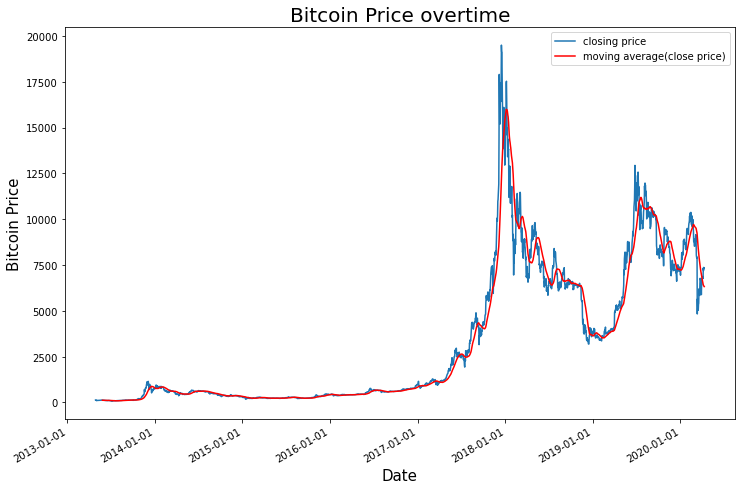

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
x3 = [datetime.strptime(d,'%Y-%m-%d').date() for d in joined_data.Date]

joined_data['moving_avg'] = joined_data['Close'].rolling(window=30).mean()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.plot(x3, joined_data.Close, label='closing price')
plt.plot(x3, joined_data.moving_avg, color='red', label='moving average(close price)')
plt.gcf().autofmt_xdate()
plt.xlabel("Date", fontsize=15)
plt.ylabel("Bitcoin Price", fontsize=15)
plt.title("Bitcoin Price overtime", fontsize=20)
plt.legend(loc='best')
plt.show()

In [20]:
stock_df = Sdf.retype(joined_data)
joined_data['rsi']=stock_df['rsi_14']

del joined_data['close_-1_s']
del joined_data['close_-1_d']
del joined_data['rs_14']
del joined_data['rsi_14']

joined_data.head()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,low,close,volume,market cap,moving_avg,closepm,closenm,closepm_14_smma,closenm_14_smma,rsi
date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,135.98999,11090225.0,1.508160e+09,4.992244e+06,7186.0,0.126539,0.0,379.0,7.950000,74.501151,...,132.10,134.21,-,"1,500,520,000",NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,141.50002,11094750.0,1.569907e+09,1.288606e+07,7211.0,0.140126,0.0,313.0,6.350000,80.746756,...,134.00,144.54,-,"1,491,160,000",NaN,10.33,0.00,10.330000,0.000000,100.000000
2013-04-30,139.10900,11098475.0,1.543898e+09,1.152067e+07,7238.0,0.185539,0.0,320.0,7.766667,74.633390,...,134.05,139.00,-,"1,597,780,000",NaN,0.00,5.54,4.973704,2.872593,63.389190
2013-05-01,124.29980,11102000.0,1.379976e+09,2.723124e+07,7261.0,0.167730,0.0,314.0,8.000000,70.626228,...,107.72,116.99,-,"1,542,820,000",NaN,0.00,22.01,3.191536,9.729872,24.699597
2013-05-02,105.00003,11105600.0,1.166088e+09,3.068792e+07,7288.0,0.189949,0.0,336.0,7.866667,72.128914,...,92.28,105.21,-,"1,292,190,000",NaN,0.00,11.78,2.302893,10.300704,18.271712


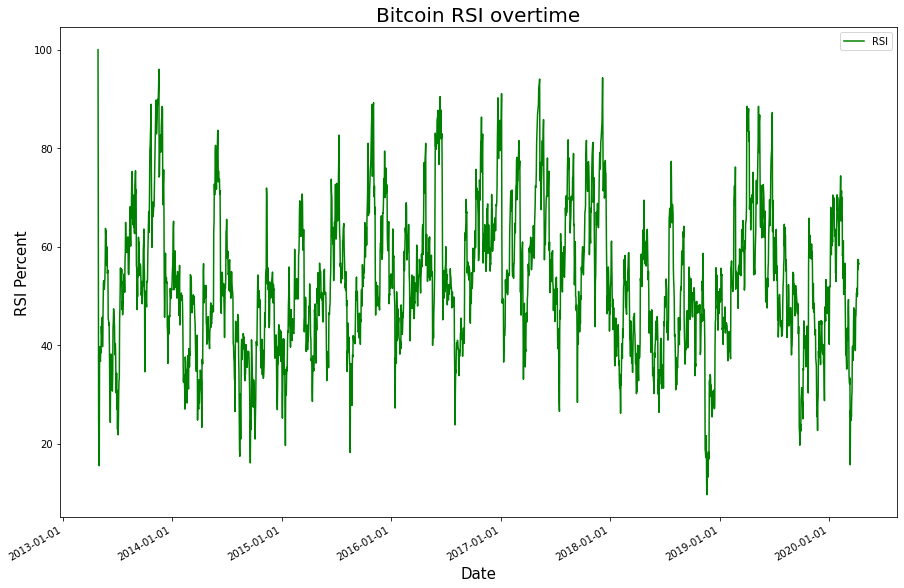

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
x3 = [datetime.strptime(d,'%Y-%m-%d').date() for d in joined_data.index]

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.plot(x3, joined_data.rsi, color='green', label='RSI')
plt.gcf().autofmt_xdate()
plt.xlabel("Date", fontsize=15)
plt.ylabel("RSI Percent", fontsize=15)
plt.title("Bitcoin RSI overtime", fontsize=20)
plt.legend(loc='best')
plt.show()

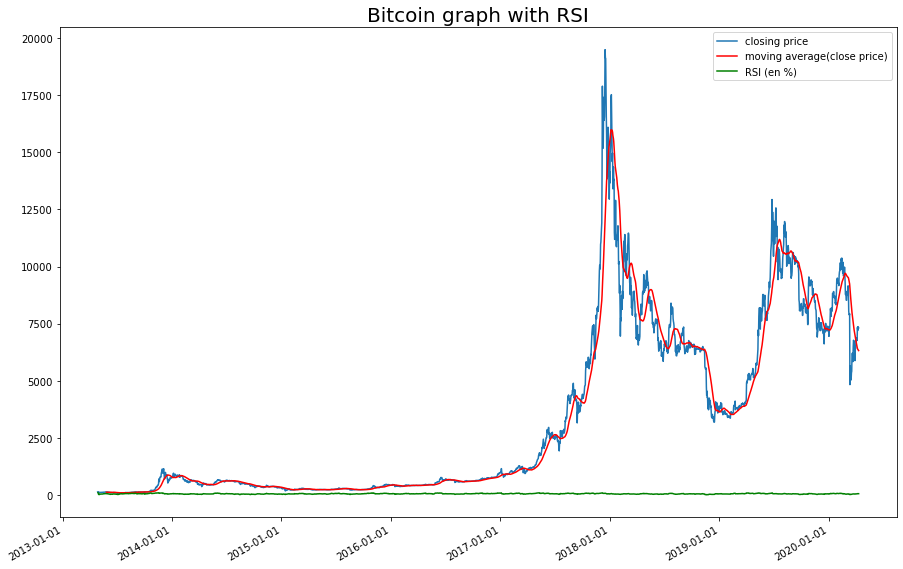

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
x3 = [datetime.strptime(d,'%Y-%m-%d').date() for d in joined_data.index]

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.plot(x3, joined_data.close, label='closing price')
plt.plot(x3, joined_data.moving_avg, color='red', label='moving average(close price)')
plt.plot(x3, joined_data.rsi, color='green', label='RSI (en %)')
plt.gcf().autofmt_xdate()
plt.title("Bitcoin graph with RSI", fontsize=20)
plt.legend(loc='best')
plt.show()

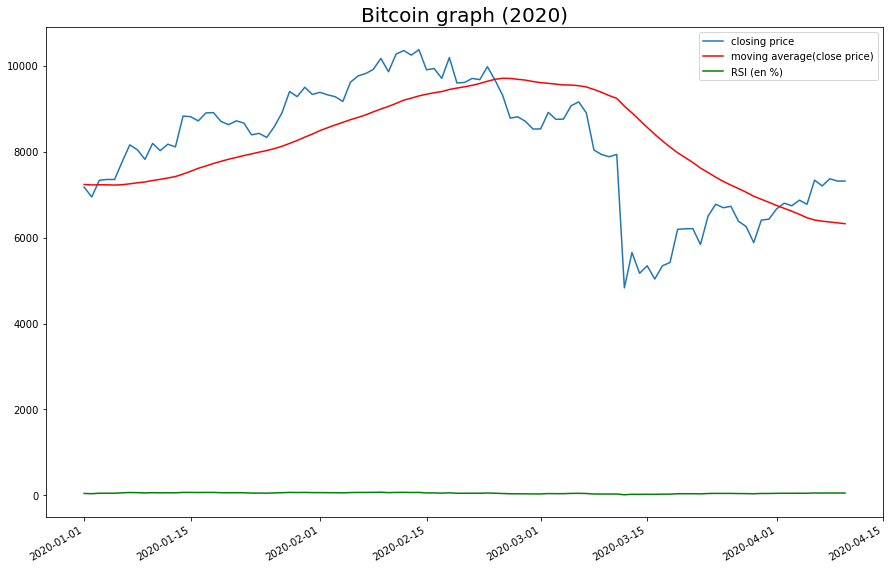

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
x3 = [datetime.strptime(d,'%Y-%m-%d').date() for d in joined_data.index if date(2020, 1, 1) <= datetime.strptime(d,'%Y-%m-%d').date() <= date(2020, 12, 31)]
twentytwenty = pd.DataFrame([joined_data.loc[x.strftime("%Y-%m-%d")] for x in x3])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.plot(x3, twentytwenty.close, label='closing price')
plt.plot(x3, twentytwenty.moving_avg, color='red', label='moving average(close price)')
plt.plot(x3, twentytwenty.rsi, color='green', label='RSI (en %)')
plt.gcf().autofmt_xdate()
plt.title("Bitcoin graph (2020)", fontsize=20)
plt.legend(loc='best')
plt.show()